<a href="https://colab.research.google.com/github/YonseiESC/ESC20-SPRING/blob/master/%EA%B3%BC%EC%A0%9C%20%EC%A0%9C%EC%B6%9C/week1/6%EC%A1%B0/week1_hw_%EC%9D%B4%EC%9E%AC%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week1 LAB: Bayesian Belief Update


In [0]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

## Case1: Beta-Binomial (unknown p)

In [0]:
from scipy.stats import binom, beta

**Sampling Density**

Every statistical inference or prediction should always start first with the assumption on  sampling density , i.e. data generating process. In this case, we have a data set from a classical coin toss,  yi∈{0,1} , where  yi=1  with a probability  p , and our goal is to make Bayesian inference on the parameter  p 

In [3]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


**Prior Belief**

Prior belief can be in any form (flat, peaked, skewed, bimodal...) as long as the belief satistifies the fundamental axioms of probability. We choose beta distribution to express our belief solely because of its analytic convenience, that is, the resulting posterior can be integrated.

Text(0, 0.5, 'p(theta)')

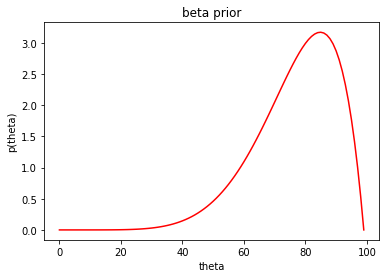

In [4]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

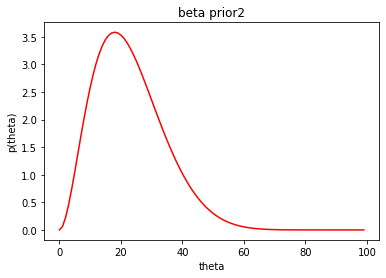

In [5]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

**Likelihood (Sampling Density)**

Once you have specified your belief, you need to consider  "how likely"  the data is at each point of  p . What you would really come in handy is a plot where every possible choice of  p  is on x-axis and the y-axis shows "how likely the data came from that choice of  p . Likelihood does exactly this.

(0.0, 0.0005)

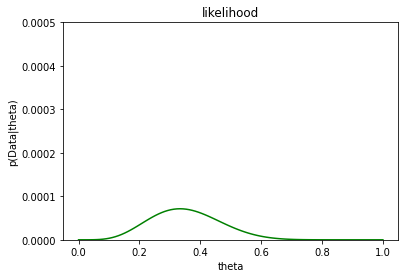

In [6]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

**Posterior: Updated Belief**

The posterior is defined by strictly applying Bayes Rule;  p(θ|D)=p(θ)p(D|θ)∫p(θ)p(D|θ)dθ . This is in most cases analytically intractable, but in this case where we have a  conjugacy  between the belief distribution and the sampling distribution, this simply reduces to updating belief paratemers; a, b. Otherwise we have to approximate  p(θ|D)  or use numerical methods, such as MCMC.

Text(0, 0.5, 'p(theta)')

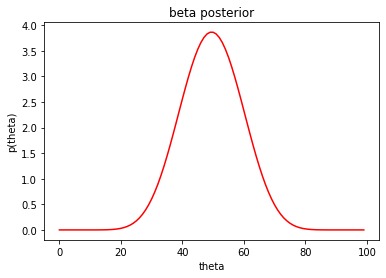

In [7]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0.0, 4.0)

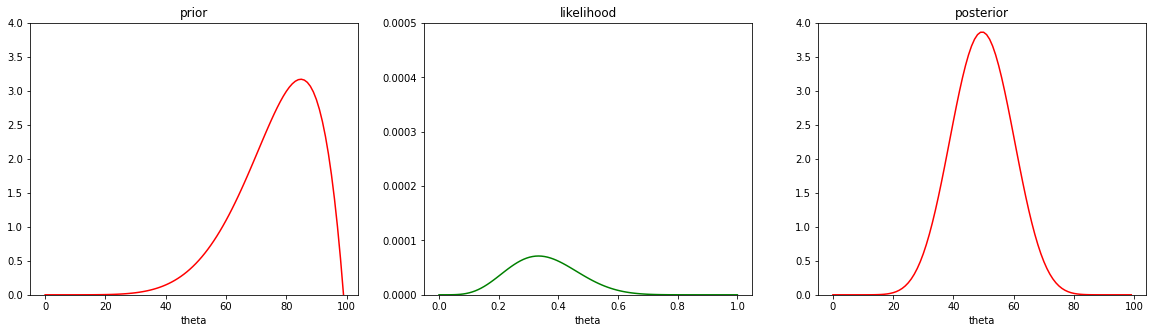

In [8]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

## (HW1) Case 2: Gaussian-Gaussian (unknown mu)


In [0]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

In [0]:
from scipy.stats import norm

**Sampling Density**

In [12]:
# population parameter
mu = 22
# generate toy sample
sd2 = 2
N = 30
np.random.seed(101)
data = norm.rvs(mu,sd2, size=N)
print(data)
print(data.size)
print(data.sum())

[27.414 23.256 23.816 23.008 23.302 21.361 20.304 23.212 17.964 23.48
 23.058 20.822 22.377 20.482 20.134 23.91  22.382 25.958 27.212 23.367
 22.605 25.387 18.588 19.682 21.73  22.781 22.334 22.369 23.615 22.146]
30
678.0556907686918


**Prior Belief**

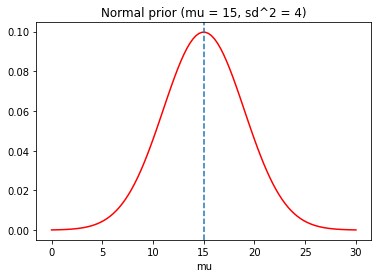

In [13]:
# choose your belief parameter
mu_prior= 15; sd2_prior= 4

prior = norm(mu_prior, sd2_prior)
theta = np.linspace(0,30,100)
plt.plot(theta, prior.pdf(theta), color='r')
plt.title('Normal prior (mu = '+str(mu_prior)+ ', sd^2 = '+ str(sd2_prior)+')')
plt.xlabel('mu')

plt.axvline(x= mu_prior,linestyle = '--')

**Likelihood (Sampling Density)**

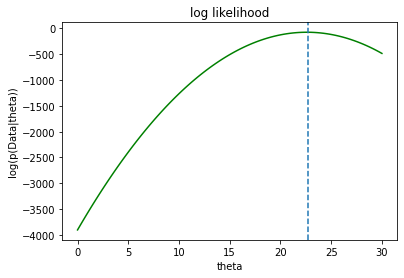

In [14]:
def likelihood(Data, mu, sd2):
    loglikelihood = 0
    
    for i in range(len(Data)):
        loglikelihood = loglikelihood + np.log(np.exp(-((Data[i]-mu)**2)/(2*sd2))*(1/(np.sqrt(2*np.pi*sd2))))
    
    return loglikelihood

plt.plot(theta, likelihood(data, theta, sd2), color='g')
plt.title("log likelihood")
plt.xlabel("theta")
plt.ylabel("log(p(Data|theta))")

plt.axvline(x= theta[np.where(likelihood(data, theta, sd2) == max(likelihood(data, theta, sd2)))],linestyle = '--')

**Posterior: Updated Belief**

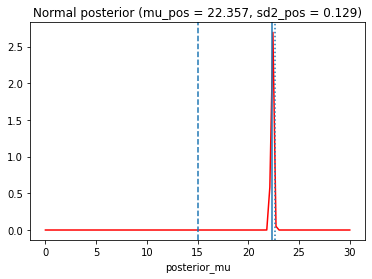

In [15]:
# Belief update
mu_pos = (mu_prior/sd2_prior + data.sum()/(sd2**2)) / ( 1/sd2_prior + N/(sd2**2))
sd_pos = 1 / ( 1/sd2_prior + N/(sd2**2))

posterior = norm(mu_pos, sd_pos)
theta = np.linspace(0,30,100)
plt.plot(theta,posterior.pdf(theta), color='r')
plt.title('Normal posterior (mu_pos = '+str(round(mu_pos,3))+', sd2_pos = '+ str(round(sd_pos, 3))+ ')')
plt.xlabel('posterior_mu')

plt.axvline(x= mu_prior,linestyle = '--')
plt.axvline(x= mu_pos,linestyle = '-')
plt.axvline(x= data.sum()/N,linestyle = ':')


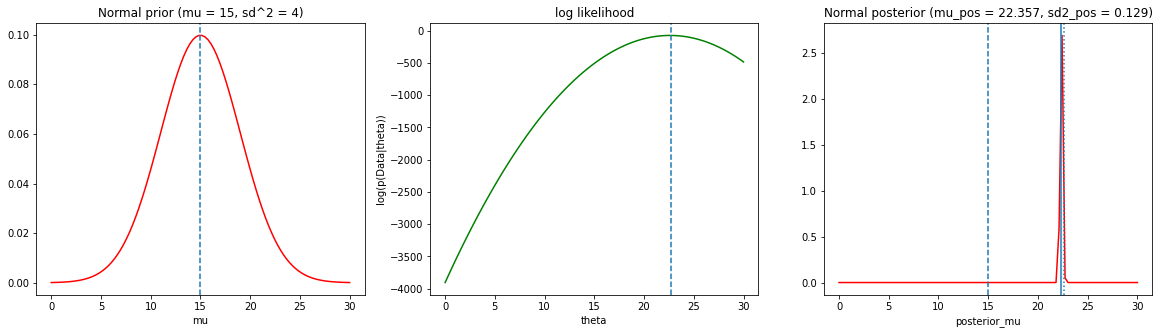

In [16]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(theta, prior.pdf(theta), color='r')
ax1.set_title('Normal prior (mu = '+str(mu_prior)+ ', sd^2 = '+ str(sd2_prior)+')')
ax1.set_xlabel('mu')
ax1.axvline(x= mu_prior,linestyle = '--')

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta, sd2), color='g')
ax2.set_title("log likelihood")
ax2.set_xlabel("theta")
ax2.set_ylabel("log(p(Data|theta))")
ax2.axvline(x= theta[np.where(likelihood(data, theta, sd2) == max(likelihood(data, theta, sd2)))],linestyle = '--')

ax3 = fig.add_subplot(133)
ax3.plot(theta,posterior.pdf(theta), color='r')
ax3.set_title('Normal posterior (mu_pos = '+str(round(mu_pos,3))+', sd2_pos = '+ str(round(sd_pos, 3))+ ')')
ax3.set_xlabel('posterior_mu')

ax3.axvline(x= mu_prior,linestyle = '--')
ax3.axvline(x= mu_pos,linestyle = '-')
ax3.axvline(x= data.sum()/N,linestyle = ':')

## (HW2): Polynomial Regression

데이터 개수 n에 따라 모델 복잡도 p의 관계 를 간단한 다항식 회귀 모형을 통해 알아보는 것이 목표. 여기서 다항식의 차수 d를 결정하는 것은 결국 모든 모델에서 "모델을 얼마나 복잡하게 만들 것이냐"를 결정하는 것과 같은 맥락. 데이터 개수를 적당히 봐가면서 복잡하게 해야지, 데이터도 적은데 쓸데없이 복잡한 모델을 만들면 Train set에 과적화가 되어버린다 라는 결과를 직접 확인해보자.*이탤릭체 텍스트*


In [17]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**데이터 불러오기**


In [18]:
# Importing the dataset
 from google.colab import files

uploaded = files.upload()


Saving hour.csv to hour.csv


In [19]:
bike = pd.read_csv('hour.csv')
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.288,0.81,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.273,0.80,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.273,0.80,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.288,0.75,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.288,0.75,0.000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.258,0.60,0.164,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.258,0.60,0.164,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.258,0.60,0.164,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.273,0.56,0.134,13,48,61


**데이터 들여다보기**

In [20]:
bike.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [21]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,17379.000,17379.000
mean,189.463,0.497
std,181.388,0.193
min,1.000,0.020
25%,40.000,0.340
50%,142.000,0.500
75%,281.000,0.660
max,977.000,1.000


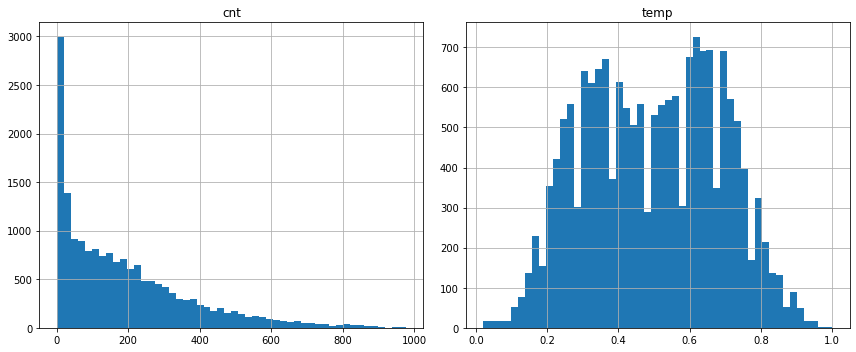

In [22]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

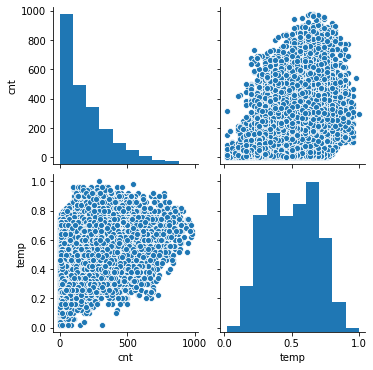

In [23]:
sns.pairplot(Data)

**Polynomial Regression**

In [0]:
np.random.seed(123)
data = Data.sample(n=50).reset_index()

**1) Train-Test Split**

In [25]:
np.random.seed(123)
N= data.shape[0]
test = np.random.choice(np.arange(N),20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(30, 3) (20, 3)


In [0]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

**2) Design Matrix 만들기**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly.shape


(30, 3)

**3) Linear Regression Fitting**

In [29]:
lin2 = LinearRegression(fit_intercept=False)
lin2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [30]:
lin2.coef_

array([[-11.986, 238.624, 334.696]])

In [0]:
X_train_fit = X_train_poly.dot(lin2.coef_.T)
mse_train = np.log((X_train_fit - y_train).T.dot((X_train_fit - y_train))/len(y_train))[0,0]

In [0]:
X_test_fit = X_test_poly.dot(lin2.coef_.T)
mse_test = np.log((X_test_fit - y_test).T.dot((X_test_fit - y_test))/len(y_test))[0,0]

In [33]:
print(mse_train, mse_test)

9.994226896319882 10.143935517502928


**반복문을 통해 차수를 높임**

In [34]:
mse_table = np.zeros((13,2))

for i in range(1,14) :
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    X_train_poly.shape

    lin2 = LinearRegression(fit_intercept=False)
    lin2.fit(X_train_poly, y_train)

    X_train_fit = X_train_poly.dot(lin2.coef_.T)
    mse_train = np.log((X_train_fit - y_train).T.dot((X_train_fit - y_train))/len(y_train))[0,0]

    X_test_fit = X_test_poly.dot(lin2.coef_.T)
    mse_test = np.log((X_test_fit - y_test).T.dot((X_test_fit - y_test))/len(y_test))[0,0]

    mse_table[i-1,] =     [mse_train, mse_test]

print(mse_table)

[[ 9.998 10.022]
 [ 9.994 10.144]
 [ 9.985  9.776]
 [ 9.904 12.315]
 [ 9.897 13.329]
 [ 9.87  14.152]
 [ 9.867 15.964]
 [ 9.841 18.713]
 [ 9.841 19.482]
 [ 9.84  17.268]
 [ 9.84  19.429]
 [ 9.838 25.254]
 [ 9.834 28.982]]


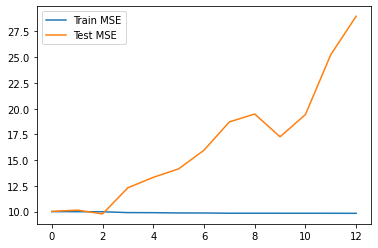

In [35]:
plt.plot(mse_table[:,0], label='Train MSE')
plt.plot(mse_table[:,1], label='Test MSE')
plt.legend(loc='upper left')
plt.show()